In [previous lesson](https://www.kaggle.com/prashantkikani/solving-the-titanic-problem-deep-learning-way/), we try to solve Titanic problem using simple artificial neural network model.<br><br>

In this lesson we will make a classifier who can predict whether there's a cat in the image or there's a dog.<br>

![cat_vs_dog](https://images2.minutemediacdn.com/image/upload/c_crop,h_706,w_1256,x_0,y_64/f_auto,q_auto,w_1100/v1554995050/shape/mentalfloss/516438-istock-637689912.jpg)
<center>Cat vs. Dog classifier using Deep Learning ([source](https://storymaps.arcgis.com/stories/b239e2a4d6bf402fa8c6f4b99720f2c1))</center>
<br>

### Input
Image which contains either a cat or a dog.

### Output
Prediction of whether cat is there or dog is there in the image.

For images, we use CNNs.<br>
So, let's learn what are they.

## Convolutional Neural Networks (CNN)
So, in this lesson, we will learn about convolutional neural nets or CNNs.<br>

CNNs are a type of neural networks which are **used to detect patterns**; mostly in images.<br><br>
We use `kernels` to capture patterns in CNNs.<br>
We slide `kernels` to all over the image & capture patterns & pass those patterns to next layers.<br><br>

![kernel sliding](https://miro.medium.com/max/700/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

<center>This is how a kernel(3x3 square box above) slide through an image</center>
<br>

We will see this in details.<br>

This is how image looks like to computers.<br>

![image to computer](https://mozanunal.com/images/pixel.png)
<center>Image to a computer</center>
<br>

Every number in above black & white image is a pixel which indicates how much each color is present in that pixel.<br><br>
Every colored image is made of 3 basic colors.<br>
* <font color="red">Red</font>
* <font color="green">Green</font>
* <font color="blue">Blue</font>

<br>

## Kernels

Kernels in convolutions is 3x3 or 5x5 matrix which are used to detect different type of features.<br>
Like, horizontal lines, vertical lines, diagonal lines etc.<br>
We can also call kernels as **feature detectors** / **pattern detectors**.<br><br>


### We do "convolutional" operation on whole image while sliding kernel on it.<br>

![kernel](https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif)

"Convolution" is nothing but matrix multiplication between pixel values of image & kernel values.<br>

### We are capturing patterns while sliding this kernel over the image.

These values of 3x3 kernels are random at first.<br>
But, while we are training our neural network with images, this values will update in a way, they will capture meaningful patterns like horizontal & vertical lines.<br>

* We use multiple kernels to capture multiple patterns.<br>
* One kernel capture captures one type of pattern.<br>
* We combine(concatenate) different patterns captured from every kernel in current layer & pass them to next layer.<br>
* Then next layer capture patterns on previous layer's captured patterns i.e. one step higher level patterns.<br>
* This process continues to seveal layer until we reach to very high level patterns like hands, legs, mouth etc body parts.<br>

## That's the CRUX in convolution neural networks.

That's how a computer can learn to capture patterns in images & take decisions accordingly.<br><br>

When one Convolution layer passes it's captured patterns to next Convolution layer, it capture more abstract patterns.<br>
Like..

![elephant](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Loxodonta_africana_-_old_bull_%28Ngorongoro%2C_2009%29.jpg/220px-Loxodonta_africana_-_old_bull_%28Ngorongoro%2C_2009%29.jpg)

* First it captures the edges of the elephant in image.
* Then it combines nearby edges & lines to make body parts of the elephant like legs, trunk etc.
* Then it combines all body parts to make a full elephant.

After combining body parts, it remembers from it’s training that these are the body parts which only one animal can have together. **Elephant**.<br>

So, this is how kernels look like after training on 1st & 2nd CNN layers.

![kernel](https://i.iter01.com/images/6389a7188a0fac8d347f5524dfe05f0daae8db2b67bdaccc115a820031af5e89.png)
<center>this is how kernels look like on first, second and third layers.</center>
<br>

## * First layer captures vertical, horizontal, diagonal lines.
## * Second layer captures a bit higher level patterns like textures etc.

![kernel](https://i.iter01.com/images/e97ff7f1bf951a5073cd1a1bdb1c177404db2cf36a4d672792b03ec85177bfde.png)
<center>this is how kernels look like on 4th & 5th layers.</center>
<br>

## We can see, as we go more towards higher level layers, we see more higher & abstract patterns are captured.

## This is how CNN learns while training from images.

### Enough of verbal knowledge sharing.<br>
Let's do some coding.<br>

Let's imprort necessary libraries first.


In [1]:
# for numerical things
import numpy as np

# opencv & matplotlib to deal with images
import cv2
import matplotlib.pyplot as plt

# os for file system related tasks
import os

# random to fix seeds
import random
import tensorflow as tf
import torch

# import keras to build CNN model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

Using TensorFlow backend.


# Let's open & visualize the data files.

In [2]:
CATS_PATH = "../input/cat-and-dog/training_set/training_set/cats/"

cats_images_paths = os.listdir(CATS_PATH)
len(cats_images_paths)

4001

So, we have 4001 images of Cats🐱.<br><br>

Let's have a look at some of them.

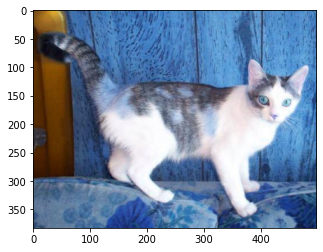

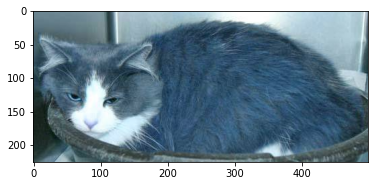

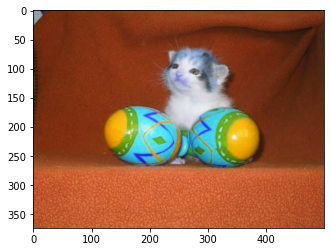

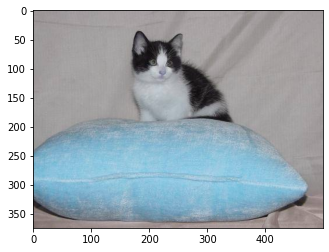

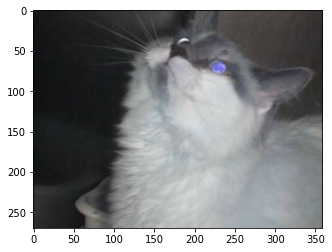

In [3]:
# randomly select 5 images.
cats_5_images = random.sample(cats_images_paths, k=5)

for img in cats_5_images:
    cv2_img = cv2.imread(CATS_PATH + img)
    plt.figure()
    plt.imshow(cv2_img)

In [4]:
DOGS_PATH = "../input/cat-and-dog/training_set/training_set/dogs/"

dogs_images_paths = os.listdir(DOGS_PATH)
len(dogs_images_paths)

4006

So, we have 4006 images of Cats🐶.

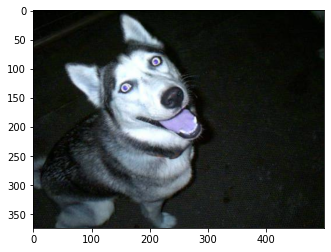

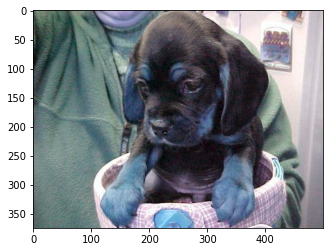

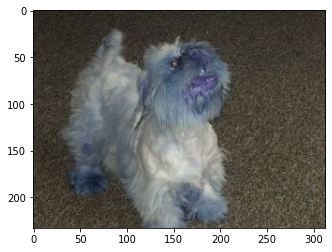

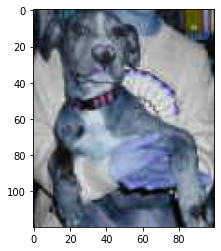

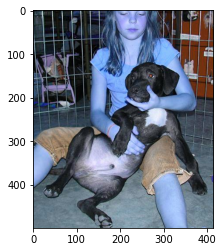

In [5]:
# randomly select 5 images.
dogs_5_images = random.sample(dogs_images_paths, k=5)

for img in dogs_5_images:
    cv2_img = cv2.imread(DOGS_PATH + img)
    plt.figure()
    plt.imshow(cv2_img)

Data looks good.<br>
Now, let's build our CNN model to train it to detect whether it's cat or a dog.

In [6]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    tf.random.set_seed(seed)

# We fix all the random seed so that, we can reproduce the results.
seed_everything(2020)

In [7]:
# images shape
IMAGE_SHAPE = 128

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(16, kernel_size=(3,3), activation = 'relu')(input_layer)
convolution_layer_2 = Conv2D(16, kernel_size=(3,3), activation = 'relu')(convolution_layer_1)
max_pool_1 = MaxPooling2D(pool_size=(2,2))(convolution_layer_2)
batch_norm_1 = BatchNormalization()(max_pool_1)
dropout_1 = Dropout(0.2)(batch_norm_1)

convolution_layer_3 = Conv2D(32, kernel_size=(3,3), activation = 'relu')(dropout_1)
convolution_layer_4 = Conv2D(32, kernel_size=(3,3), activation = 'relu')(convolution_layer_3)
max_pool_2 = MaxPooling2D(pool_size=(2,2))(convolution_layer_4)
batch_norm_2 = BatchNormalization()(max_pool_2)
dropout_2 = Dropout(0.2)(batch_norm_2)

flattened = Flatten()(dropout_2)
dense_layer_1 = Dense(128, activation='relu')(flattened)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
output_layer = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(input=input_layer, output=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        4640

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Model have `3.4`M parameters which we will tune while back-propagation.

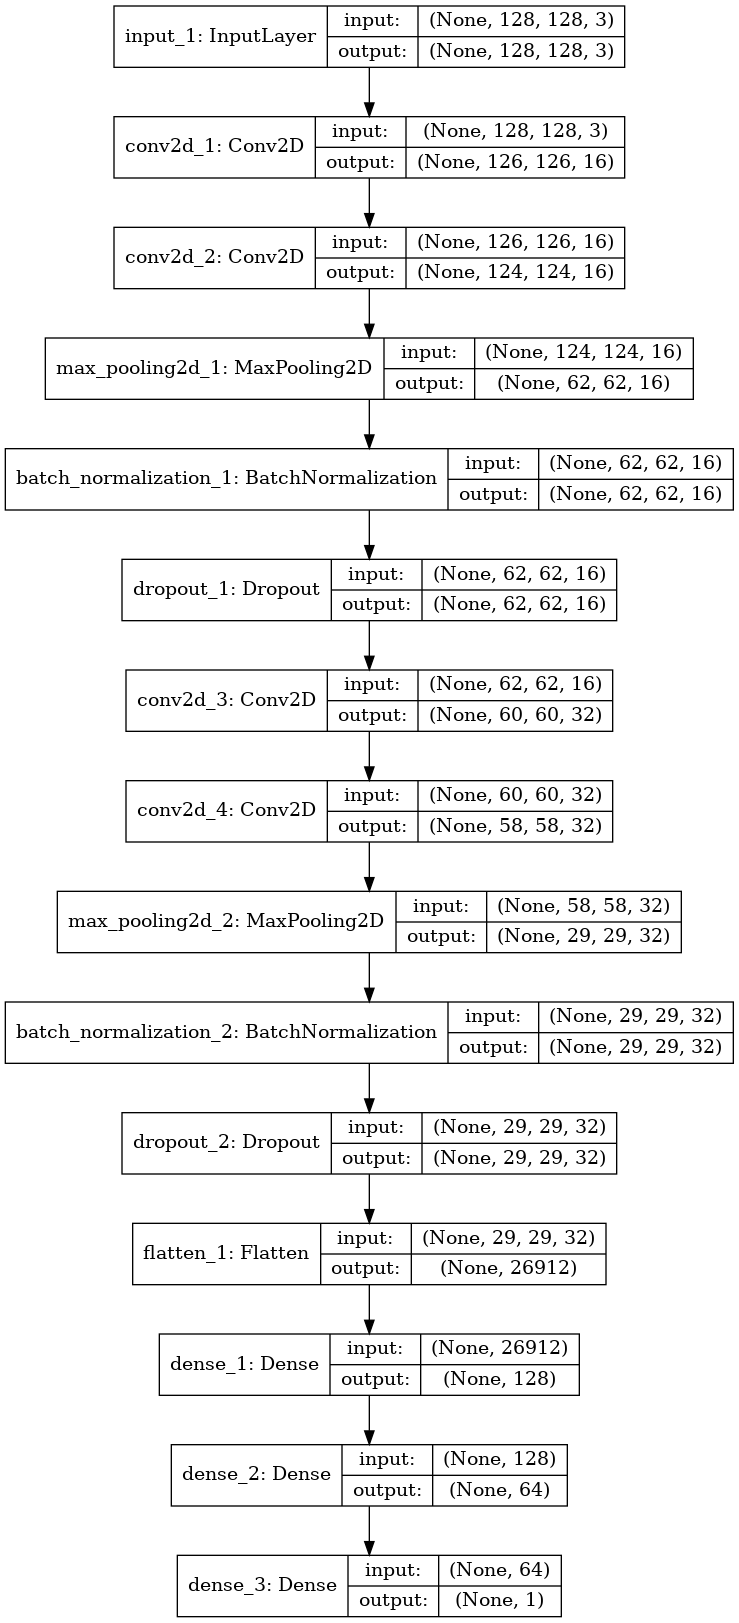

In [8]:
plot_model(model, show_shapes=True)

# Before training it, let's understand this model first.

* `input_layer` : This layer takes images as input. We specify the shape of images we will give.<br><br>
* `convolution_layer_1` : This is a convolutional layer with 16 different unique kernels of size 3x3.
    * All these 3x3 sized 32 kernels will roll over the input images & will capture different patterns.
    * Whatever pattern they will capture, it will pass to next layer.
<br><br>
* `convolution_layer_2` : This is a convolutional layer same as previous one with 16 different unique kernels of size 3x3.
    * This will get captured patterns from previous layer.
    * And it'll capture patterns on top it i.e. a bit higher level features & pass to next layer.
<br><br>
* `max_pool_1` : Max pool layer is used to minimize the image size by pooling maximum number out of 2x2 grid.<br>
    * This demografic shows a sample max-pool layer.
    ![max_pool](https://distilledai.com/wp-content/uploads/2020/04/2x2-max-pool-CNN.png)
<br><br>
* `batch_norm_1` : Batch Normalization is just normalizing values of matrixes. It kind of acts as a "stabilizer" in neural network training.
<br><br>
* `dropout_1` : Dropout is interesting trick. In Dropout, we ***randomly*** turn off some percentage of our neurons so that their's output can't go to next layer. Here we are turning off 20% of our total neurons.
    * Purpose of doing this is again to make our training robust. 
    * Network should not depend some specific neurons to make predictions. And random turn will allow us to do that.
    * Picture below help us to understand it.
    ![dropout](https://distilledai.com/wp-content/uploads/2020/04/dropout-in-deep-learning.png)
<br><br>
* `convolution_layer_3` : This is a convolutional layer with 32 different unique kernels of size 3x3.
    * All these 3x3 sized 64 kernels will roll over the output of max-pool & will capture different patterns.
    * Whatever pattern they will capture, it will pass to next layer.
<br><br>
* `convolution_layer_4` : This is a convolutional layer same as previous one with 32 different unique kernels of size 3x3.
    * This will get captured patterns from previous layer.
    * And it'll capture patterns on top it i.e. a bit higher level features & pass to next layer.
<br><br>
## Generally, as we go deeper into the network, number of kernels we use in a Conv layer increases as we capture more higher level patterns.
* `max_pool_2` : This is again same as previous `max_pool_1`<br><br>
* `batch_norm_2` & `dropout_2` are same type of layer as discussed before<br><br>
* `flattened` : Flatten means, combining everything into one 1D array.
    * We do this to combine features of all the kernels into one array & give to Dense layer to classify it.
<br><br>
* `dense_layer_1` : This is a simple Dense fully connected layer which we are using to classify what type of patterns have we captured.
<br><br>
* `dense_layer_2` : Same as above.<br><br>
* `output_layer` : From this layer, we get our predictions.

### That's our simple CNN model.

Now, let's train it.<br>

## While training it, we do something called `data augmentation`.
Purpose of data augmentation is, to leverage same data to create more data.<br>
Like, 
![image_augmentation](https://distilledai.com/wp-content/uploads/2020/04/image-augmentation.png)
<center>Image Augmentation ([source](https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/))</center><br>
In above image, we created 6 different images out of 1 image by zooming & rotating it !<br>
Label for all these images will remain same. Cat.<br>
### What a trick !

In [9]:
train_data_generator = ImageDataGenerator(
    # We divide each pixel value(0, 255) with 255 to make them in range [0, 1]
    rescale = 1./255, 
    
    # We randomly shear & zoom our image while training to make our training robust
    shear_range = 0.2, 
    zoom_range = 0.2, 
    
    # We also flip our images by 180 degree horizontally to make our training robust
    horizontal_flip = True
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

training_set_data = train_data_generator.flow_from_directory(
    "../input/cat-and-dog/training_set/training_set/", 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary'
)

test_set_data = test_data_generator.flow_from_directory(
    '../input/cat-and-dog/test_set/test_set/',
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Now, we have data ready.<br>
Let's start model training.

In [10]:
model.fit_generator(
    training_set_data, 
    epochs = 10, 
    validation_data = test_set_data, 
)

Epoch 1/10
126/126 [==============================] - 88s 702ms/step - loss: 0.8567 - accuracy: 0.6064 - val_loss: 0.7565 - val_accuracy: 0.4998
Epoch 2/10
126/126 [==============================] - 54s 426ms/step - loss: 0.6380 - accuracy: 0.6692 - val_loss: 0.8603 - val_accuracy: 0.4993
Epoch 3/10
126/126 [==============================] - 54s 429ms/step - loss: 0.5525 - accuracy: 0.7200 - val_loss: 0.6324 - val_accuracy: 0.5437
Epoch 4/10
126/126 [==============================] - 54s 430ms/step - loss: 0.5061 - accuracy: 0.7502 - val_loss: 0.5326 - val_accuracy: 0.6540
Epoch 5/10
126/126 [==============================] - 55s 433ms/step - loss: 0.4729 - accuracy: 0.7716 - val_loss: 0.5269 - val_accuracy: 0.7281
Epoch 6/10
126/126 [==============================] - 53s 423ms/step - loss: 0.4381 - accuracy: 0.7950 - val_loss: 0.4354 - val_accuracy: 0.7711
Epoch 7/10
126/126 [==============================] - 54s 429ms/step - loss: 0.4085 - accuracy: 0.8145 - val_loss: 0.4681 - val_ac

## Cool.
Our model have trained.<br>
You can see above the accuracy we have achieved.<br>

## Now, let's test our model on test data.
### Don't forget, we have not used this test data in our training. <br>So, our model have never seen these images ever.

Model : It's a DOG


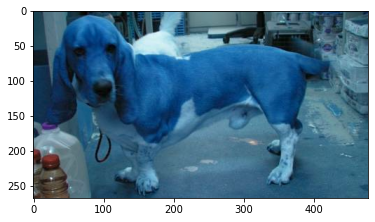

In [11]:
TEST_PATH = "../input/cat-and-dog/test_set/test_set/"
test_dogs_images = os.listdir(TEST_PATH + "dogs/")

test_dog_img = test_dogs_images[5]
test_dog_img = cv2.imread(TEST_PATH + "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv2.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

Model : It's a CAT


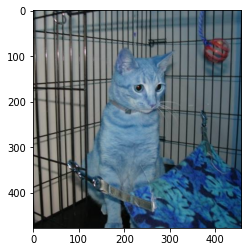

In [12]:
TEST_PATH = "../input/cat-and-dog/test_set/test_set/"
test_cats_images = os.listdir(TEST_PATH + "cats/")

test_cat_img = test_cats_images[10]
test_cat_img = cv2.imread(TEST_PATH + "cats/" + test_cat_img)

plt.figure()
plt.imshow(test_cat_img)

test_cat_img = cv2.resize(test_cat_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_cat_img = test_cat_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model.predict(test_cat_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

## We have a moderate level CNN model who can predict whether an image have CAT or DOG.
### There are tons of things we can improve in this model like transfer learning etc. But this is a great start.

# Summary

* We have understood what Kernels are.
* We have understood what Convolution is.
* We saw how kernels roll over on the images.
* We understood what Max-pool layer does.
* We saw what dropout is & why we do it.
* We build a CNN model from scratch to predict whether there is a cat or dog in the image.

## Upvote this kernel if you have learned something from it.<br>
## Tell me if you have any kind of doubts / questions in comment section below.

## In the next lesson we'll see the basics of NLP by solving the Sarcasm Detection problem.

# See you in the [next lesson](https://www.kaggle.com/prashantkikani/are-you-being-sarcastic-sarcasm-detection-nlp) !